In [1]:
#import libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
#read data csv file
data=pd.read_csv("C:/Users/isler/Documents/Data Analytics/Hospital_Readmission/diabetic_data.csv")

In [3]:
#preview column headers and first 5 rows 
data.head()

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


In [4]:
#View the name of all 50 columns
data.columns

Index(['encounter_id', 'patient_nbr', 'race', 'gender', 'age', 'weight',
       'admission_type_id', 'discharge_disposition_id', 'admission_source_id',
       'time_in_hospital', 'payer_code', 'medical_specialty',
       'num_lab_procedures', 'num_procedures', 'num_medications',
       'number_outpatient', 'number_emergency', 'number_inpatient', 'diag_1',
       'diag_2', 'diag_3', 'number_diagnoses', 'max_glu_serum', 'A1Cresult',
       'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide',
       'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide',
       'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone',
       'tolazamide', 'examide', 'citoglipton', 'insulin',
       'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone', 'change', 'diabetesMed', 'readmitted'],
      dtype='object')

In [5]:
#View the data types
data.dtypes

encounter_id                 int64
patient_nbr                  int64
race                        object
gender                      object
age                         object
weight                      object
admission_type_id            int64
discharge_disposition_id     int64
admission_source_id          int64
time_in_hospital             int64
payer_code                  object
medical_specialty           object
num_lab_procedures           int64
num_procedures               int64
num_medications              int64
number_outpatient            int64
number_emergency             int64
number_inpatient             int64
diag_1                      object
diag_2                      object
diag_3                      object
number_diagnoses             int64
max_glu_serum               object
A1Cresult                   object
metformin                   object
repaglinide                 object
nateglinide                 object
chlorpropamide              object
glimepiride         

In [6]:
#Identifing how many rows and columns in dataset
data.shape

(101766, 50)

In [7]:
#View unique values for readmitted column
data['readmitted'].unique()

array(['NO', '>30', '<30'], dtype=object)

In [8]:
#Count missing values that show up at ?
for col in data.columns:
    if data[col].dtype == object:
        print(col,data[col][data[col]=='?'].count())

race 2273
gender 0
age 0
weight 98569
payer_code 40256
medical_specialty 49949
diag_1 21
diag_2 358
diag_3 1423
max_glu_serum 0
A1Cresult 0
metformin 0
repaglinide 0
nateglinide 0
chlorpropamide 0
glimepiride 0
acetohexamide 0
glipizide 0
glyburide 0
tolbutamide 0
pioglitazone 0
rosiglitazone 0
acarbose 0
miglitol 0
troglitazone 0
tolazamide 0
examide 0
citoglipton 0
insulin 0
glyburide-metformin 0
glipizide-metformin 0
glimepiride-pioglitazone 0
metformin-rosiglitazone 0
metformin-pioglitazone 0
change 0
diabetesMed 0
readmitted 0


In [9]:
#drop columns with a lot of missing values then preview column headers to confirm they've dropped
data=data.drop(['weight', 'payer_code', 'medical_specialty'], axis=1)
data.head()

,encounter_id,patient_nbr,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),6,25,1,1,41,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),1,1,7,3,59,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),1,1,7,2,11,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),1,1,7,2,44,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),1,1,7,1,51,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


In [10]:
#remove remaining missing values that have ? as value
def remove_question_mark(data):
    return data[~data.isin(['?']).any(axis=1)]
data_cleaned=remove_question_mark(data)
data_cleaned.head()

,encounter_id,patient_nbr,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
1,149190,55629189,Caucasian,Female,[10-20),1,1,7,3,59,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),1,1,7,2,11,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),1,1,7,2,44,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),1,1,7,1,51,...,No,Steady,No,No,No,No,No,Ch,Yes,NO
5,35754,82637451,Caucasian,Male,[50-60),2,1,2,3,31,...,No,Steady,No,No,No,No,No,No,Yes,>30


In [11]:
#Check dataset size after removing missing values
data_cleaned.shape

(98053, 47)

In [12]:
#Check for any missing values that show up at ?
for col in data.columns:
    if data_cleaned[col].dtype == object:
        print(col,data_cleaned[col][data_cleaned[col]=='?'].count())

race 0
gender 0
age 0
diag_1 0
diag_2 0
diag_3 0
max_glu_serum 0
A1Cresult 0
metformin 0
repaglinide 0
nateglinide 0
chlorpropamide 0
glimepiride 0
acetohexamide 0
glipizide 0
glyburide 0
tolbutamide 0
pioglitazone 0
rosiglitazone 0
acarbose 0
miglitol 0
troglitazone 0
tolazamide 0
examide 0
citoglipton 0
insulin 0
glyburide-metformin 0
glipizide-metformin 0
glimepiride-pioglitazone 0
metformin-rosiglitazone 0
metformin-pioglitazone 0
change 0
diabetesMed 0
readmitted 0


In [13]:
#view all columns
data_cleaned.columns

Index(['encounter_id', 'patient_nbr', 'race', 'gender', 'age',
       'admission_type_id', 'discharge_disposition_id', 'admission_source_id',
       'time_in_hospital', 'num_lab_procedures', 'num_procedures',
       'num_medications', 'number_outpatient', 'number_emergency',
       'number_inpatient', 'diag_1', 'diag_2', 'diag_3', 'number_diagnoses',
       'max_glu_serum', 'A1Cresult', 'metformin', 'repaglinide', 'nateglinide',
       'chlorpropamide', 'glimepiride', 'acetohexamide', 'glipizide',
       'glyburide', 'tolbutamide', 'pioglitazone', 'rosiglitazone', 'acarbose',
       'miglitol', 'troglitazone', 'tolazamide', 'examide', 'citoglipton',
       'insulin', 'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone', 'change', 'diabetesMed', 'readmitted'],
      dtype='object')

In [14]:
#view change values and change to boolean
#data_cleaned['change'].unique
data_cleaned['change']=data_cleaned['change'].replace('Ch',1)
data_cleaned['change']=data_cleaned['change'].replace('No',0)

data_cleaned['change'].unique

c:\Users\Isler\anaconda3\envs\mlenv\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
c:\Users\Isler\anaconda3\envs\mlenv\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


<bound method Series.unique of 1         1
2         0
3         1
4         1
5         0
         ..
101761    1
101762    0
101763    1
101764    1
101765    0
Name: change, Length: 98053, dtype: int64>

In [15]:
#View entire dataset to explore 
print(data_cleaned)

        encounter_id  patient_nbr             race  gender      age  \
1             149190     55629189        Caucasian  Female  [10-20)   
2              64410     86047875  AfricanAmerican  Female  [20-30)   
3             500364     82442376        Caucasian    Male  [30-40)   
4              16680     42519267        Caucasian    Male  [40-50)   
5              35754     82637451        Caucasian    Male  [50-60)   
...              ...          ...              ...     ...      ...   
101761     443847548    100162476  AfricanAmerican    Male  [70-80)   
101762     443847782     74694222  AfricanAmerican  Female  [80-90)   
101763     443854148     41088789        Caucasian    Male  [70-80)   
101764     443857166     31693671        Caucasian  Female  [80-90)   
101765     443867222    175429310        Caucasian    Male  [70-80)   

        admission_type_id  discharge_disposition_id  admission_source_id  \
1                       1                         1                    

In [16]:
#Change gender coding to boolean
data_cleaned['gender']=data_cleaned['gender'].replace('Male',0)
data_cleaned['gender']=data_cleaned['gender'].replace('Female',1)
data_cleaned['gender'].unique()

c:\Users\Isler\anaconda3\envs\mlenv\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
c:\Users\Isler\anaconda3\envs\mlenv\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


array([1, 0, 'Unknown/Invalid'], dtype=object)

In [17]:
#Drop rows with unknown/invalid gender and check shape to ensure rows are removed
data_cleaned=data_cleaned[data_cleaned['gender'] != 'Unknown/Invalid']
data_cleaned.shape
print(data_cleaned)

        encounter_id  patient_nbr             race gender      age  \
1             149190     55629189        Caucasian      1  [10-20)   
2              64410     86047875  AfricanAmerican      1  [20-30)   
3             500364     82442376        Caucasian      0  [30-40)   
4              16680     42519267        Caucasian      0  [40-50)   
5              35754     82637451        Caucasian      0  [50-60)   
...              ...          ...              ...    ...      ...   
101761     443847548    100162476  AfricanAmerican      0  [70-80)   
101762     443847782     74694222  AfricanAmerican      1  [80-90)   
101763     443854148     41088789        Caucasian      0  [70-80)   
101764     443857166     31693671        Caucasian      1  [80-90)   
101765     443867222    175429310        Caucasian      0  [70-80)   

        admission_type_id  discharge_disposition_id  admission_source_id  \
1                       1                         1                    7   
2      

In [18]:
data_cleaned['age'].unique()

array(['[10-20)', '[20-30)', '[30-40)', '[40-50)', '[50-60)', '[60-70)',
       '[70-80)', '[80-90)', '[90-100)', '[0-10)'], dtype=object)

In [19]:
#Change age column into grouping categories
#Define age mapping and apply to new column "age_groupp"
age_labels = {
    '[0-10)' : 'Child',
    '[10-20)': 'Teen',
    '[20-30)': 'Young Adult',
    '[30-40)': 'Adult',
    '[40-50)': 'Middle-Aged',
    '[50-60)': 'Pre-Senior',
    '[60-70)': 'Senior',
    '[70-80)': 'Elderly',
    '[80-90)': 'Very Elderly',
    '[90-100)': 'Super Elderly'
}

data_cleaned['age_group']=data_cleaned['age'].map(age_labels)
print(data_cleaned)

        encounter_id  patient_nbr             race gender      age  \
1             149190     55629189        Caucasian      1  [10-20)   
2              64410     86047875  AfricanAmerican      1  [20-30)   
3             500364     82442376        Caucasian      0  [30-40)   
4              16680     42519267        Caucasian      0  [40-50)   
5              35754     82637451        Caucasian      0  [50-60)   
...              ...          ...              ...    ...      ...   
101761     443847548    100162476  AfricanAmerican      0  [70-80)   
101762     443847782     74694222  AfricanAmerican      1  [80-90)   
101763     443854148     41088789        Caucasian      0  [70-80)   
101764     443857166     31693671        Caucasian      1  [80-90)   
101765     443867222    175429310        Caucasian      0  [70-80)   

        admission_type_id  discharge_disposition_id  admission_source_id  \
1                       1                         1                    7   
2      

In [20]:
data_cleaned.columns

Index(['encounter_id', 'patient_nbr', 'race', 'gender', 'age',
       'admission_type_id', 'discharge_disposition_id', 'admission_source_id',
       'time_in_hospital', 'num_lab_procedures', 'num_procedures',
       'num_medications', 'number_outpatient', 'number_emergency',
       'number_inpatient', 'diag_1', 'diag_2', 'diag_3', 'number_diagnoses',
       'max_glu_serum', 'A1Cresult', 'metformin', 'repaglinide', 'nateglinide',
       'chlorpropamide', 'glimepiride', 'acetohexamide', 'glipizide',
       'glyburide', 'tolbutamide', 'pioglitazone', 'rosiglitazone', 'acarbose',
       'miglitol', 'troglitazone', 'tolazamide', 'examide', 'citoglipton',
       'insulin', 'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone', 'change', 'diabetesMed', 'readmitted',
       'age_group'],
      dtype='object')

In [21]:
#Combine number of times patient had outpatient, inpatient and emergency visits
data_cleaned['number_visits']=data_cleaned['number_outpatient']+ data_cleaned['number_emergency']+ data_cleaned['number_inpatient']
print(data_cleaned['number_visits'])
print(data_cleaned)

1         0
2         3
3         0
4         0
5         0
         ..
101761    0
101762    1
101763    1
101764    1
101765    0
Name: number_visits, Length: 98052, dtype: int64
        encounter_id  patient_nbr             race gender      age  \
1             149190     55629189        Caucasian      1  [10-20)   
2              64410     86047875  AfricanAmerican      1  [20-30)   
3             500364     82442376        Caucasian      0  [30-40)   
4              16680     42519267        Caucasian      0  [40-50)   
5              35754     82637451        Caucasian      0  [50-60)   
...              ...          ...              ...    ...      ...   
101761     443847548    100162476  AfricanAmerican      0  [70-80)   
101762     443847782     74694222  AfricanAmerican      1  [80-90)   
101763     443854148     41088789        Caucasian      0  [70-80)   
101764     443857166     31693671        Caucasian      1  [80-90)   
101765     443867222    175429310        Caucasia

In [22]:
data_cleaned.head(10).T

,1,2,3,4,5,6,7,8,9,10
encounter_id,149190,64410,500364,16680,35754,55842,63768,12522,15738,28236
patient_nbr,55629189,86047875,82442376,42519267,82637451,84259809,114882984,48330783,63555939,89869032
race,Caucasian,AfricanAmerican,Caucasian,Caucasian,Caucasian,Caucasian,Caucasian,Caucasian,Caucasian,AfricanAmerican
gender,1,1,0,0,0,0,0,1,1,1
age,[10-20),[20-30),[30-40),[40-50),[50-60),[60-70),[70-80),[80-90),[90-100),[40-50)
admission_type_id,1,1,1,1,2,3,1,2,3,1
discharge_disposition_id,1,1,1,1,1,1,1,1,3,1
admission_source_id,7,7,7,7,2,2,7,4,4,7
time_in_hospital,3,2,2,1,3,4,5,13,12,9
num_lab_procedures,59,11,44,51,31,70,73,68,33,47


In [23]:
#Loop through each column and print unique values
for col in data_cleaned.columns:
    print(f"Column: {col}")
    print(data_cleaned[col].unique())
    print('-'*35)


Column: encounter_id
[   149190     64410    500364 ... 443854148 443857166 443867222]
-----------------------------------
Column: patient_nbr
[ 55629189  86047875  82442376 ... 140199494 120975314 175429310]
-----------------------------------
Column: race
['Caucasian' 'AfricanAmerican' 'Other' 'Asian' 'Hispanic']
-----------------------------------
Column: gender
[1 0]
-----------------------------------
Column: age
['[10-20)' '[20-30)' '[30-40)' '[40-50)' '[50-60)' '[60-70)' '[70-80)'
 '[80-90)' '[90-100)' '[0-10)']
-----------------------------------
Column: admission_type_id
[1 2 3 6 4 5 8 7]
-----------------------------------
Column: discharge_disposition_id
[ 1  3  6  2  5 11  7 25 10  4 14 18  8 13 12 16 17 22 23  9 20 15 24 28
 19 27]
-----------------------------------
Column: admission_source_id
[ 7  2  4  1  5  6 20  3 17  8  9 14 10 22 11 25 13]
-----------------------------------
Column: time_in_hospital
[ 3  2  1  4  5 13 12  9  7 10 11  6  8 14]
-----------------------

In [24]:
#Remove columns where 'No' is the only value in the column. No added value to having these columns. Show shape of dataset to ensure columns are removed
data_cleaned=data_cleaned.drop(['metformin-rosiglitazone', 'citoglipton', 'examide'], axis=1)
data_cleaned.shape

(98052, 46)

In [25]:
#Change diabeteMed column to boolean
data_cleaned['diabetesMed']=data_cleaned['diabetesMed'].replace('Yes',1)
data_cleaned['diabetesMed']=data_cleaned['diabetesMed'].replace('No',0)
data_cleaned['diabetesMed'].unique()

array([1, 0], dtype=int64)

In [26]:
data_cleaned.columns

Index(['encounter_id', 'patient_nbr', 'race', 'gender', 'age',
       'admission_type_id', 'discharge_disposition_id', 'admission_source_id',
       'time_in_hospital', 'num_lab_procedures', 'num_procedures',
       'num_medications', 'number_outpatient', 'number_emergency',
       'number_inpatient', 'diag_1', 'diag_2', 'diag_3', 'number_diagnoses',
       'max_glu_serum', 'A1Cresult', 'metformin', 'repaglinide', 'nateglinide',
       'chlorpropamide', 'glimepiride', 'acetohexamide', 'glipizide',
       'glyburide', 'tolbutamide', 'pioglitazone', 'rosiglitazone', 'acarbose',
       'miglitol', 'troglitazone', 'tolazamide', 'insulin',
       'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-pioglitazone', 'change',
       'diabetesMed', 'readmitted', 'age_group', 'number_visits'],
      dtype='object')

In [27]:
#Create new column to show if patients had a change in medication during admission, if so how many times
keys=['metformin', 'repaglinide', 'nateglinide',
       'chlorpropamide', 'glimepiride', 'acetohexamide', 'glipizide',
       'glyburide', 'tolbutamide', 'pioglitazone', 'rosiglitazone', 'acarbose',
       'miglitol', 'troglitazone', 'tolazamide', 'insulin',
       'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-pioglitazone']
for col in keys:
    colname=str(col)+'temp'
    data_cleaned[colname]=data_cleaned[col].apply(lambda x: 0 if (x== 'No' or x== 'Steady') else 1)
    data_cleaned['med_change']=0
for col in keys:
    colname=str(col)+ 'temp'
    data_cleaned['med_change']=data_cleaned['med_change']+ data_cleaned[colname]
    del data_cleaned[colname]

data_cleaned['med_change'].value_counts()

0    71309
1    25350
2     1281
3      107
4        5
Name: med_change, dtype: int64

In [28]:
#Review changes
data_cleaned.head()

,encounter_id,patient_nbr,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,...,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-pioglitazone,change,diabetesMed,readmitted,age_group,number_visits,med_change
1,149190,55629189,Caucasian,1,[10-20),1,1,7,3,59,...,No,No,No,No,1,1,>30,Teen,0,1
2,64410,86047875,AfricanAmerican,1,[20-30),1,1,7,2,11,...,No,No,No,No,0,1,NO,Young Adult,3,0
3,500364,82442376,Caucasian,0,[30-40),1,1,7,2,44,...,No,No,No,No,1,1,NO,Adult,0,1
4,16680,42519267,Caucasian,0,[40-50),1,1,7,1,51,...,No,No,No,No,1,1,NO,Middle-Aged,0,0
5,35754,82637451,Caucasian,0,[50-60),2,1,2,3,31,...,No,No,No,No,0,1,>30,Pre-Senior,0,0


In [29]:
#Replace A1CResult values to 0,1 and none- ['None' '>7' '>8' 'Norm'] 
data_cleaned['A1Cresult']=data_cleaned['A1Cresult'].replace('None',-99)
data_cleaned['A1Cresult']=data_cleaned['A1Cresult'].replace('Norm',0)
data_cleaned['A1Cresult']=data_cleaned['A1Cresult'].replace('>7',1)
data_cleaned['A1Cresult']=data_cleaned['A1Cresult'].replace('>8',1)
data_cleaned['A1Cresult'].unique()

array([-99,   1,   0], dtype=int64)

In [30]:
#Replace max_glu_serum values with 0,1 and none ['None' '>300' 'Norm' '>200']
data_cleaned['max_glu_serum']=data_cleaned['max_glu_serum'].replace('None',-99)
data_cleaned['max_glu_serum']=data_cleaned['max_glu_serum'].replace('Norm',0)
data_cleaned['max_glu_serum']=data_cleaned['max_glu_serum'].replace('>300',1)
data_cleaned['max_glu_serum']=data_cleaned['max_glu_serum'].replace('>200',1)
data_cleaned['max_glu_serum'].unique()

array([-99,   1,   0], dtype=int64)

In [31]:
#Replace values in  readmitted column with 0,and 1 ['>30' 'NO' '<30']
data_cleaned['readmitted']=data_cleaned['readmitted'].replace('NO',0)
data_cleaned['readmitted']=data_cleaned['readmitted'].replace('>30',0)
data_cleaned['readmitted']=data_cleaned['readmitted'].replace('<30',1)
data_cleaned['readmitted'].unique()

array([0, 1], dtype=int64)

In [41]:
data_cleaned.head().T

,1,2,3,4,5
encounter_id,149190,64410,500364,16680,35754
patient_nbr,55629189,86047875,82442376,42519267,82637451
race,Caucasian,AfricanAmerican,Caucasian,Caucasian,Caucasian
gender,1,1,0,0,0
age,[10-20),[20-30),[30-40),[40-50),[50-60)
admission_type_id,1,1,1,1,2
discharge_disposition_id,1,1,1,1,1
admission_source_id,7,7,7,7,2
time_in_hospital,3,2,2,1,3
num_lab_procedures,59,11,44,51,31


c:\Users\Isler\anaconda3\envs\mlenv\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Count of Readmissions')

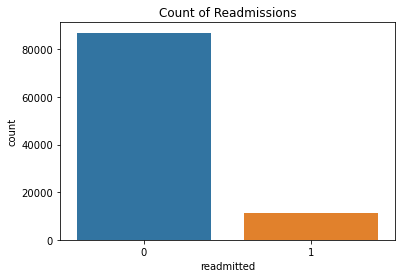

In [32]:
#Visualize readmission
sns.countplot(data_cleaned['readmitted']).set_title('Count of Readmissions')


Text(0.5, 1.0, 'Readmission Frequency vs. Time in Hospital')

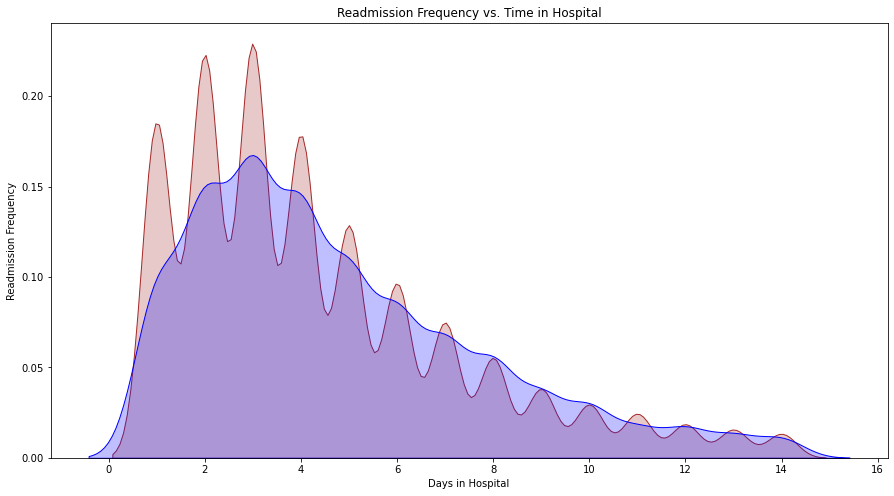

In [33]:
#Visualize readmission and time in hospital
fig=plt.figure(figsize=(15,8),)
ax=sns.kdeplot(data_cleaned.loc[(data_cleaned['readmitted']==0), 'time_in_hospital'], color='brown', shade=True, label='No Readmission')
ax=sns.kdeplot(data_cleaned.loc[(data_cleaned['readmitted']==1), 'time_in_hospital'], color='blue', shade=True, label='Readmission')
ax.set(xlabel='Days in Hospital', ylabel='Readmission Frequency')
plt.title('Readmission Frequency vs. Time in Hospital')


Text(0.5, 1.0, 'Age Groups vs. Readmission')

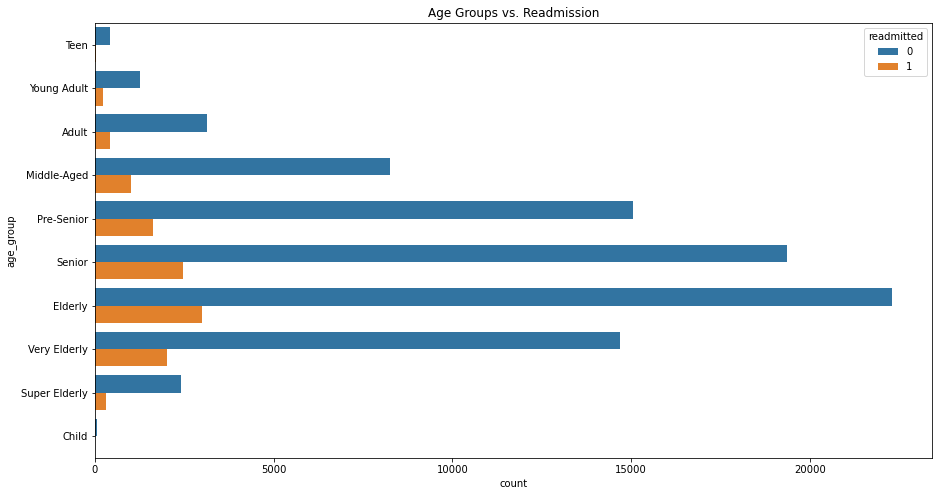

In [34]:
#Visual of readmission by age group
fig2=plt.figure(figsize=(15,8))
sns.countplot(y=data_cleaned['age_group'], hue= data_cleaned['readmitted']).set_title('Age Groups vs. Readmission')


Text(0.5, 1.0, 'Race vs. Readmission')

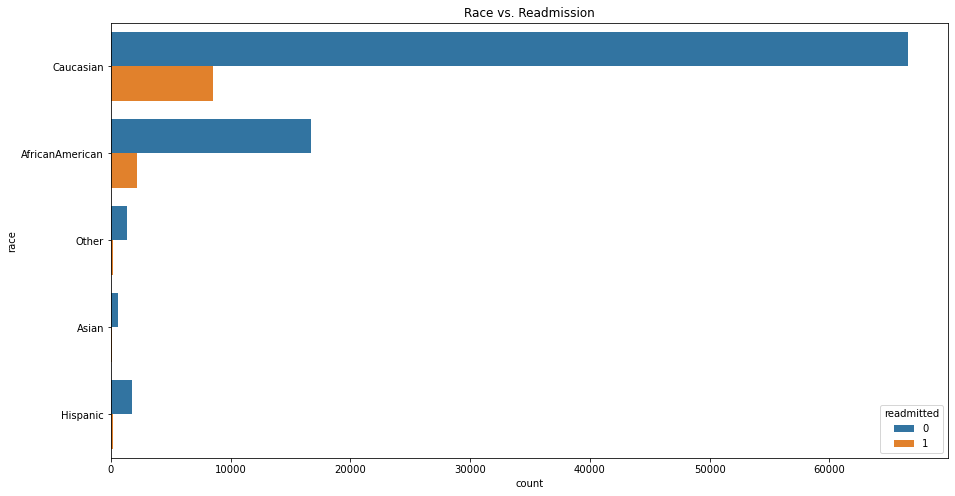

In [35]:
#Visual of readmission by race
fig3=plt.figure(figsize=(15,8))
sns.countplot(y=data_cleaned['race'], hue= data_cleaned['readmitted']).set_title('Race vs. Readmission')

Text(0.5, 1.0, 'Gender vs. Readmission')

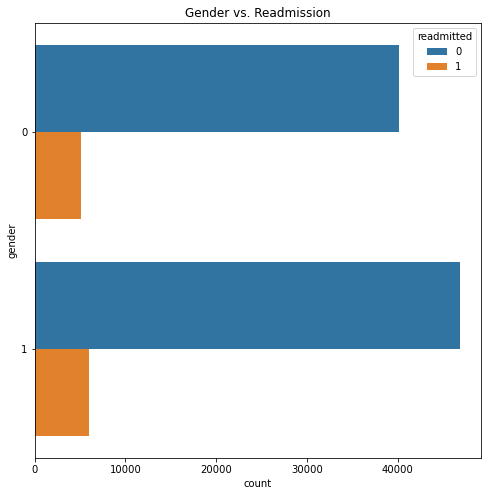

In [40]:
#Visual of readmission by gender
fig4=plt.figure(figsize=(8,8))
sns.countplot(y=data_cleaned['gender'], hue= data_cleaned['readmitted']).set_title('Gender vs. Readmission')

Text(0.5, 1.0, 'Medicine Change vs. Readmission')

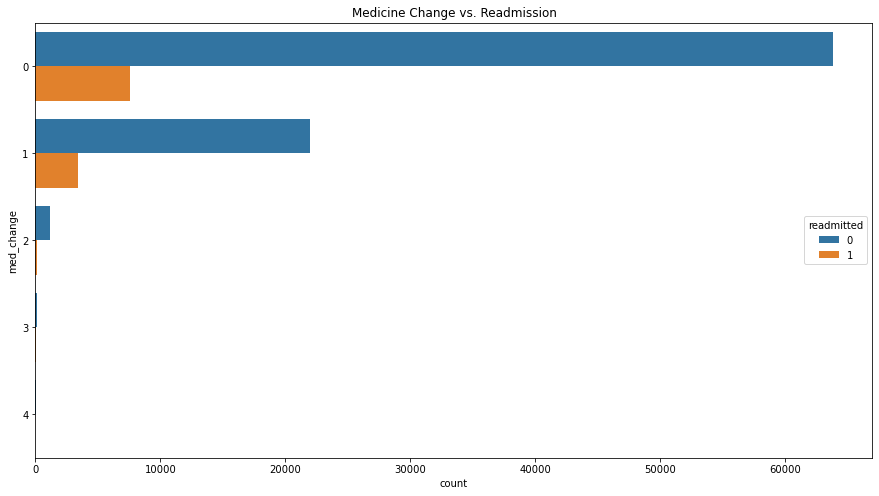

In [ ]:
#Visual of readmission by med change
fig5=plt.figure(figsize=(15,8))
sns.countplot(y=data_cleaned['med_change'], hue= data_cleaned['readmitted']).set_title('Medicine Change vs. Readmission')

Text(0.5, 1.0, 'Diabetes Medication vs. Readmission')

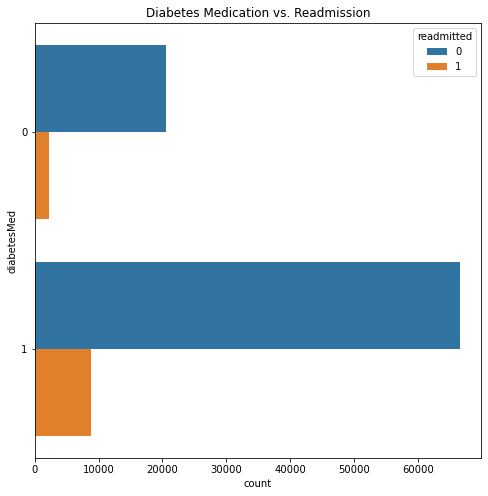

In [ ]:
#Visual of readmission by diabetic meds
fig6=plt.figure(figsize=(8,8))
sns.countplot(y=data_cleaned['diabetesMed'], hue= data_cleaned['readmitted']).set_title('Diabetes Medication vs. Readmission')

Text(0.5, 1.0, 'Number of Emergency Visits vs. Readmission')

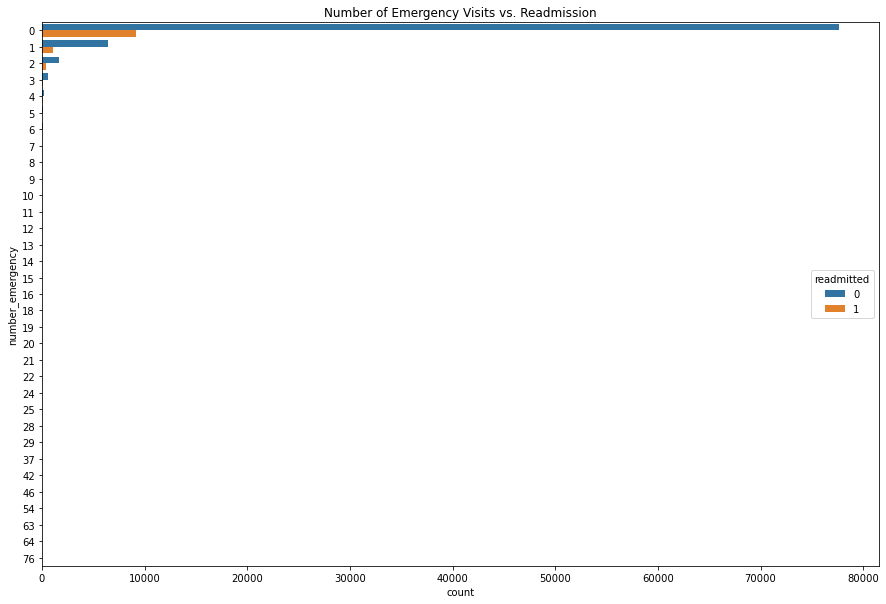

In [ ]:
#Visual of readmission by number of emergency visits
fig7=plt.figure(figsize=(15,10))
sns.countplot(y=data_cleaned['number_emergency'], hue= data_cleaned['readmitted']).set_title('Number of Emergency Visits vs. Readmission')

Text(0.5, 1.0, 'Number of Inpatient Visits vs. Readmission')

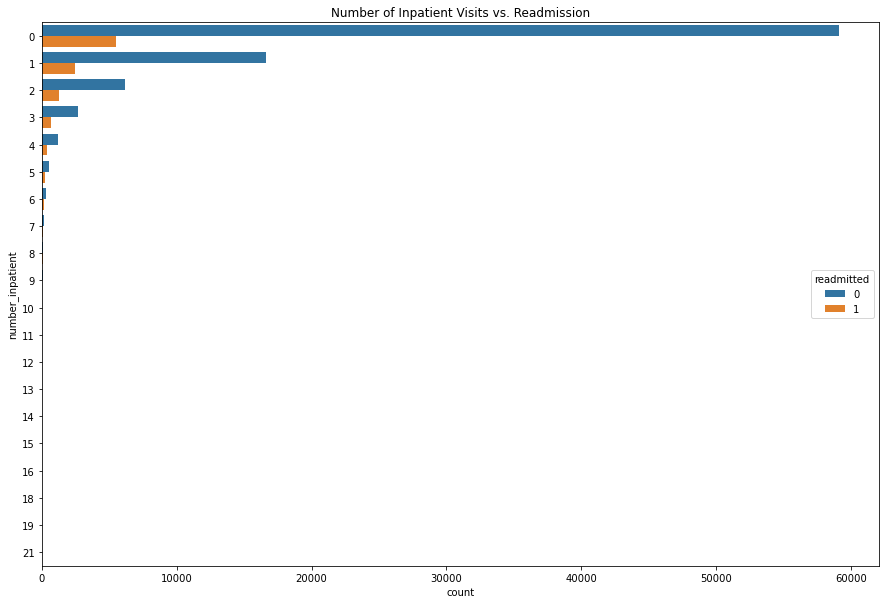

In [ ]:
#Visual of readmission by number of inpatient visits
fig8=plt.figure(figsize=(15,10))
sns.countplot(y=data_cleaned['number_inpatient'], hue= data_cleaned['readmitted']).set_title('Number of Inpatient Visits vs. Readmission')

Text(0.5, 1.0, 'Number of Outpatient Visits vs. Readmission')

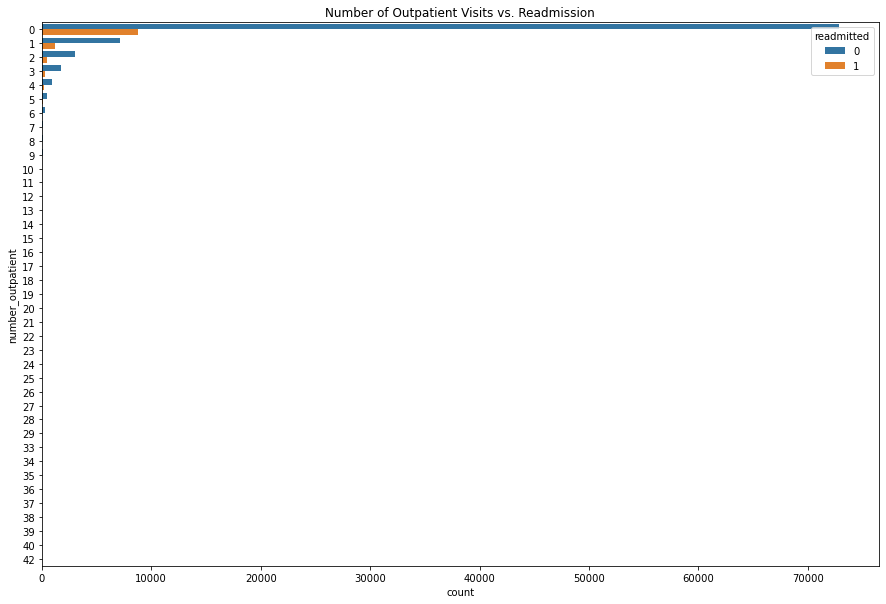

In [ ]:
#Visual of readmission by number of outpatient visits
fig9=plt.figure(figsize=(15,10))
sns.countplot(y=data_cleaned['number_outpatient'], hue= data_cleaned['readmitted']).set_title('Number of Outpatient Visits vs. Readmission')

Text(0.5, 1.0, 'Glucose Test vs. Readmission')

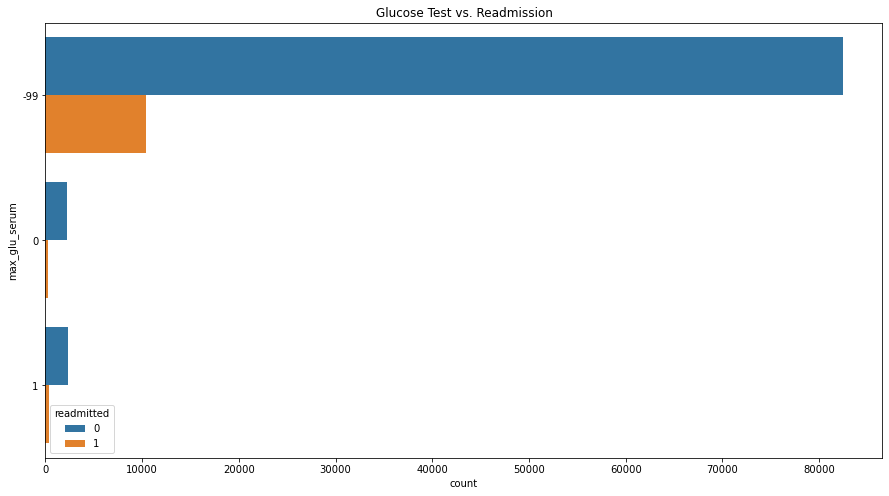

In [ ]:
#Visual of readmission by glucose test
fig10=plt.figure(figsize=(15,8))
sns.countplot(y=data_cleaned['max_glu_serum'], hue= data_cleaned['readmitted']).set_title('Glucose Test vs. Readmission')
#Many who were readmitted did not have a glucose test

Text(0.5, 1.0, 'A1C Test vs. Readmission')

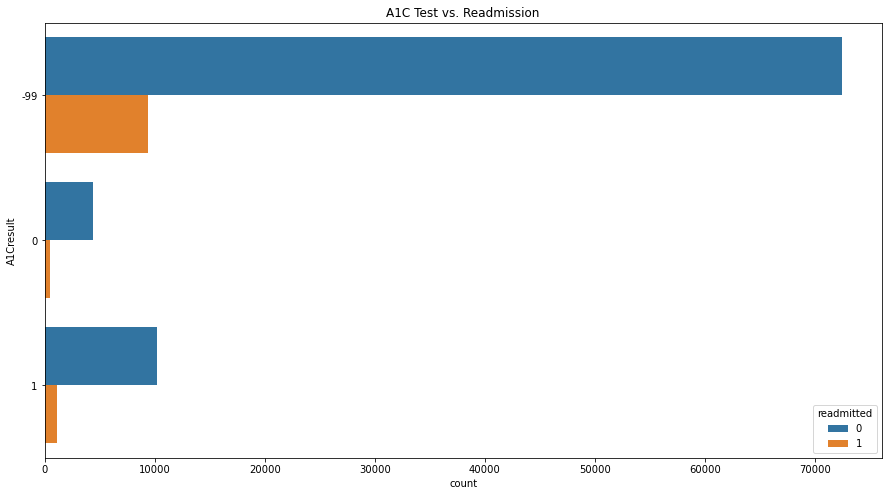

In [ ]:
#Visual of readmission by A1C Test
fig11=plt.figure(figsize=(15,8))
sns.countplot(y=data_cleaned['A1Cresult'], hue= data_cleaned['readmitted']).set_title('A1C Test vs. Readmission')
#Many who were readmitted did not have a A1C test

Text(0.5, 1.0, 'Number of lab procedure VS. Readmission')

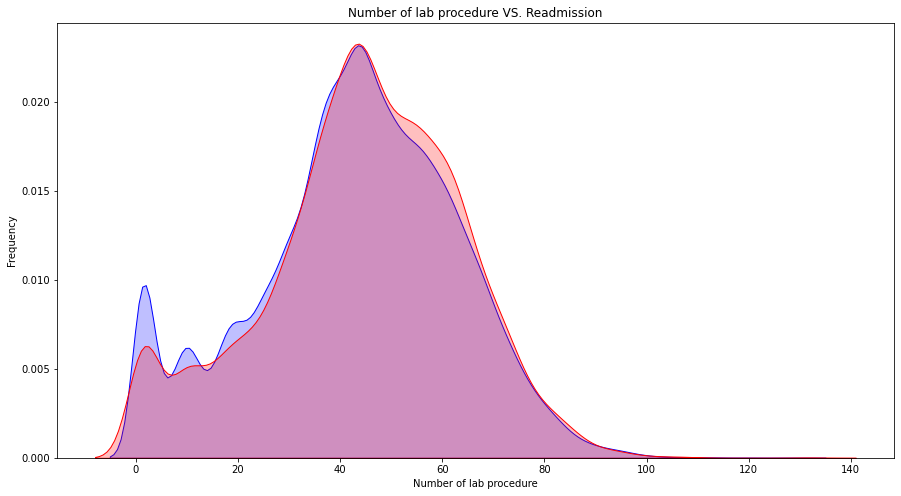

In [59]:
fig12= plt.figure(figsize=(15,8),)
ax=sns.kdeplot(data_cleaned.loc[(data_cleaned['readmitted'] == 0),'num_lab_procedures'] , color='b',shade=True,label='Not readmitted')
ax=sns.kdeplot(data_cleaned.loc[(data_cleaned['readmitted'] == 1),'num_lab_procedures'] , color='r',shade=True, label='readmitted')
ax.set(xlabel='Number of lab procedure', ylabel='Frequency')
plt.title('Number of lab procedure VS. Readmission')